# Data Classification

In [144]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix



# Import Dataset

In [16]:
col_list = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', names = col_list)

In [30]:
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
X = data[feature_names]
display(data)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# Visualization


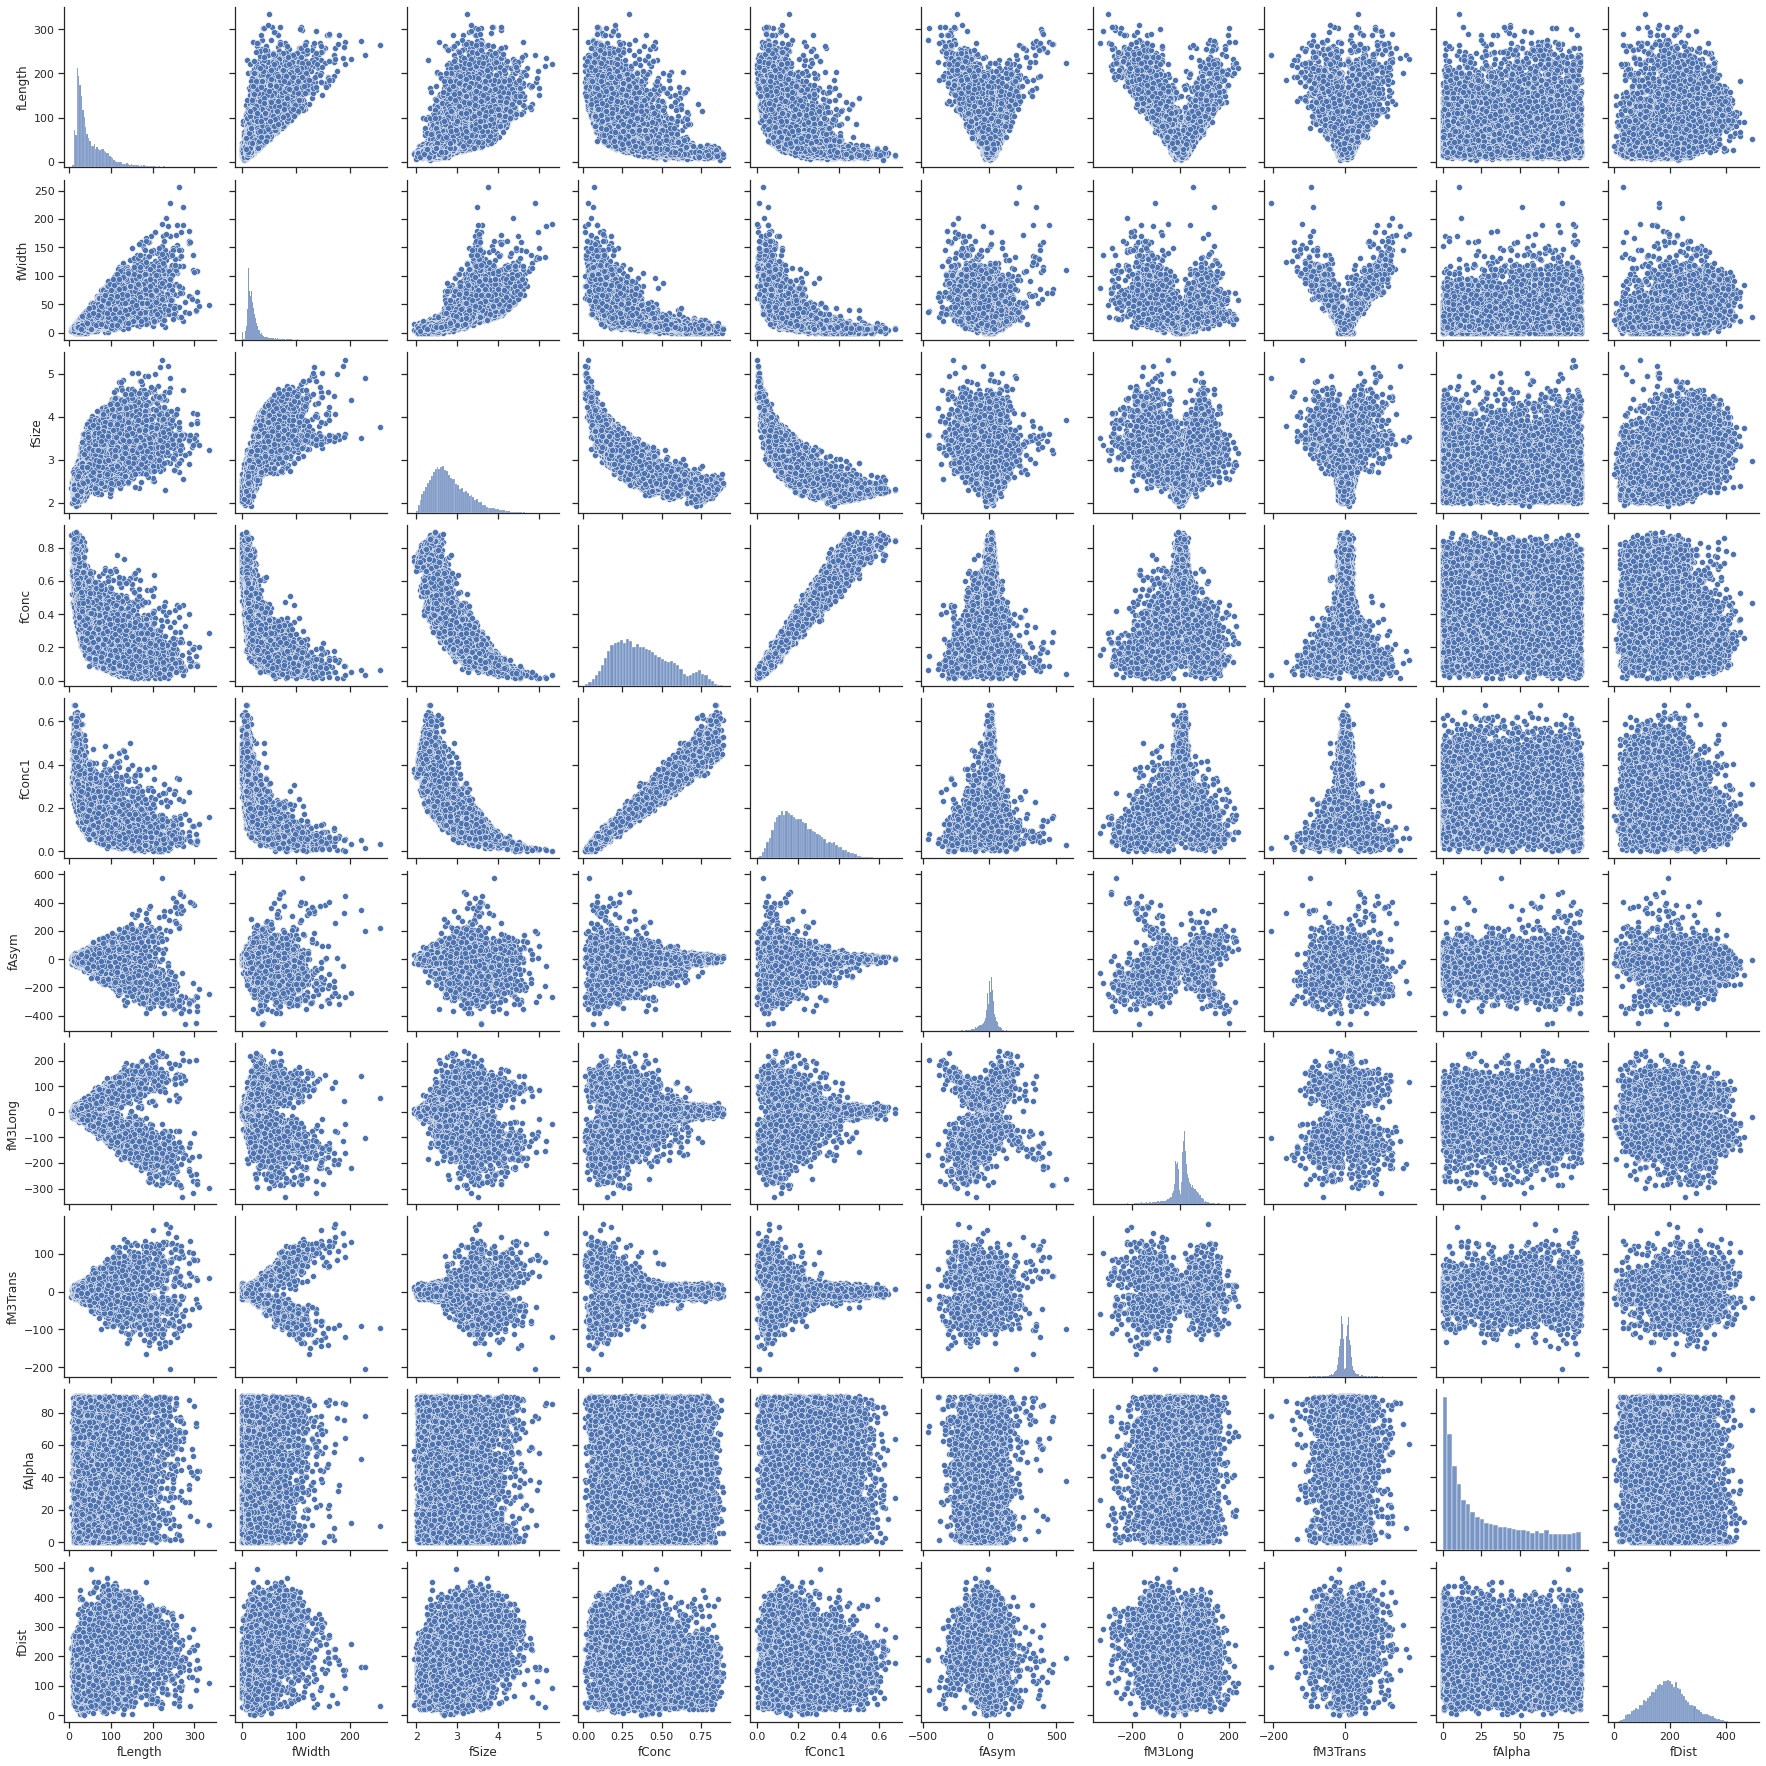

In [32]:
sns.pairplot(data)

# Tuning

In [99]:
g_subset = data[data.Class == 'g']
h_subset = data[data.Class == 'h']
g_length = len(g_subset)
h_length = len(h_subset)
balance_diff = abs(g_length-h_length)
if g_length > h_length:
  drop_indices = np.random.choice(g_subset.index, balance_diff, replace=False)
  g_subset = g_subset.drop(drop_indices)
elif h_length > g_length:
  drop_indices = np.random.choice(h_subset.index, balance_diff, replace=False)
  h_subset = h_subset.drop(drop_indices)
balanced_data = g_subset.append(h_subset)
display(balanced_data)
print(balanced_data.shape)
print(balanced_data.info())
print(balanced_data['Class'].value_counts())

# print(len(g_subset))
# print(len(h_subset))


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


(13376, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13376 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   13376 non-null  float64
 1   fWidth    13376 non-null  float64
 2   fSize     13376 non-null  float64
 3   fConc     13376 non-null  float64
 4   fConc1    13376 non-null  float64
 5   fAsym     13376 non-null  float64
 6   fM3Long   13376 non-null  float64
 7   fM3Trans  13376 non-null  float64
 8   fAlpha    13376 non-null  float64
 9   fDist     13376 non-null  float64
 10  Class     13376 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.2+ MB
None
g    6688
h    6688
Name: Class, dtype: int64
(9363, 10) (4013, 10)


In [102]:
x = balanced_data[feature_names]
y = balanced_data['Class']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1)
display(x_train)
print(x_train.shape, x_test.shape)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
14702,50.6363,22.1120,2.9232,0.3246,0.2023,32.9474,45.6706,-10.6073,2.6594,258.3340
18677,25.8840,13.1000,2.4665,0.5420,0.3671,21.9257,15.3739,-3.9416,0.7943,126.7956
10564,23.0461,17.4599,2.6149,0.4078,0.2075,-7.6848,-6.6192,-5.7936,79.5070,110.6900
18809,60.5328,34.9208,3.0436,0.2732,0.1750,-39.5703,45.4899,-28.7449,0.8124,290.6000
8722,43.0270,13.8938,2.4385,0.5209,0.2969,27.6208,14.6349,-10.9602,20.8227,262.1160
...,...,...,...,...,...,...,...,...,...,...
1696,22.9886,13.3644,2.4158,0.4952,0.2937,-21.6987,-16.2021,8.7282,14.3483,191.3310
9581,12.9945,11.0744,2.2516,0.7507,0.4398,-14.3643,6.4843,-10.2405,32.9280,205.4200
17816,63.6221,19.8789,2.8562,0.2639,0.1417,-50.1010,-40.1622,10.9015,18.4513,174.6495
466,13.1090,10.6767,2.1156,0.7739,0.4713,-13.5850,-2.5324,-10.4481,32.0404,203.5130


(9363, 10) (4013, 10)


# Classification

In [149]:
def decision_tree(x_train, x_test, y_train, y_test):
  decision_tree_gini(x_train, x_test, y_train, y_test)
  decision_tree_entropy(x_train, x_test, y_train, y_test)
 

In [150]:
def decision_tree_gini(x_train, x_test, y_train, y_test):
  global clf_gini
  clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
  clf_gini.fit(x_train, y_train)
  y_pred_gini = clf_gini.predict(x_test)
  print('Decision Tree Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
  y_pred_train_gini = clf_gini.predict(x_train)
  print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
  print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
  print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))
  plt.figure(figsize=(12,8))
  tree.plot_tree(clf_gini.fit(x_train, y_train))

In [157]:
def decision_tree_entropy(x_train, x_test, y_train, y_test):
  global clf_en
  clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
  clf_en.fit(x_train, y_train)
  y_pred_en = clf_en.predict(x_test)
  print('Decision Tree Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
  y_pred_train_en = clf_en.predict(x_train)
  print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))
  print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))
  print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))
  plt.figure(figsize=(12,8))
  tree.plot_tree(clf_en.fit(x_train, y_train)) 


Decision Tree Model accuracy score with criterion gini index: 0.7618
Training-set accuracy score: 0.7808
Training set score: 0.7808
Test set score: 0.7618
Decision Tree Model accuracy score with criterion entropy: 0.7618
Training-set accuracy score: 0.7808
Training set score: 0.7808
Test set score: 0.7618


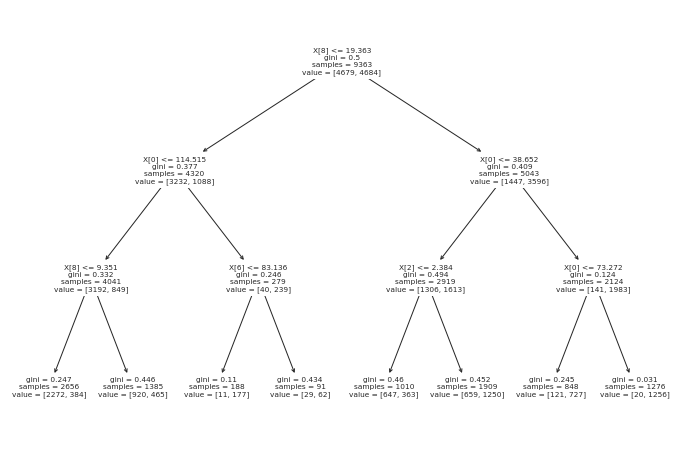

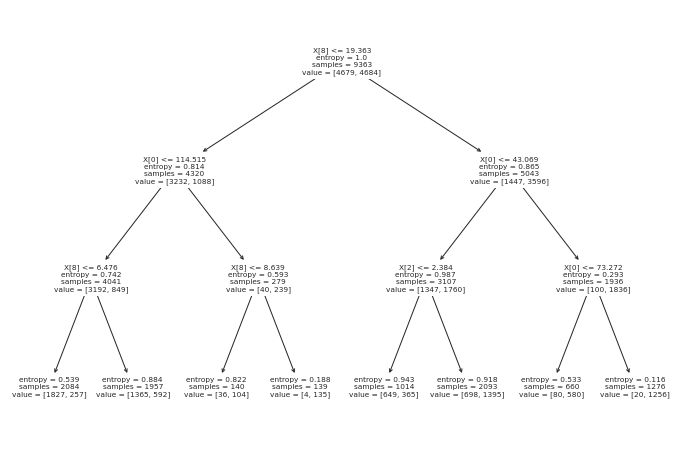

In [158]:
classifications = [decision_tree]
for classification in classifications:
  classification(x_train, x_test, y_train, y_test)